# ⚙️ Implementasi Aplikasi Plotter Suhu dengan Pandas dan Matplotlib di Python

Berikut adalah skrip Python yang mengotomatisasi visualisasi tren suhu:

* **Mengimpor Modul:** Mengimpor `pandas` untuk manipulasi data dan `matplotlib.pyplot` untuk plotting.
* **Fungsi `load_data(file_path)`:** Memuat data suhu dari file CSV menggunakan `pd.read_csv()` dan secara otomatis mem-parsing kolom 'Date' sebagai tipe datetime. Menangani potensi error saat pemuatan file.
* **Fungsi `plot_temperature(data, save_file=None)`:** Menerima DataFrame Pandas sebagai input dan melakukan plotting:
    * Menghitung rata-rata bergerak 7 hari dari kolom 'Temperature' menggunakan `rolling().mean()`.
    * Mengidentifikasi anomali suhu berdasarkan deviasi standar dari rata-rata suhu.
    * Membuat plot menggunakan `matplotlib.pyplot` dengan gaya "seaborn-v0_8-whitegrid":
        * Menampilkan suhu harian sebagai garis biru.
        * Menampilkan rata-rata bergerak 7 hari sebagai garis putus-putus oranye.
        * Menandai anomali sebagai titik merah.
    * Menambahkan judul, label sumbu, legenda, dan grid pada plot.
    * Menyimpan plot ke file jika `save_file` diberikan, atau menampilkan plot jika tidak.
* **Fungsi `main()`:** Fungsi utama program yang:
    * Menyapa pengguna.
    * Meminta jalur file CSV data suhu.
    * Memuat data menggunakan `load_data()`.
    * Meminta pengguna apakah ingin menyimpan plot dan, jika ya, meminta nama file dan memanggil `plot_temperature()` dengan parameter `save_file`. Jika tidak, memanggil `plot_temperature()` tanpa parameter `save_file` untuk menampilkan plot.
* **Blok `if __name__ == "__main__":`:** Memastikan fungsi `main()` hanya dijalankan ketika skrip dieksekusi secara langsung.

Jalankan sel kode di bawah untuk memvisualisasikan tren suhu dalam datasetmu!

Welcome to the Temperature Plotter!


Enter the path to your temperature CSV file:  temperature_data.csv


Data loaded successfully!


Do you want to save the plot? (yes/no):  yes
Enter the file name (e.g., temperature_plot.png):  temperature_plot.png


Plot saved as temperature_plot.png


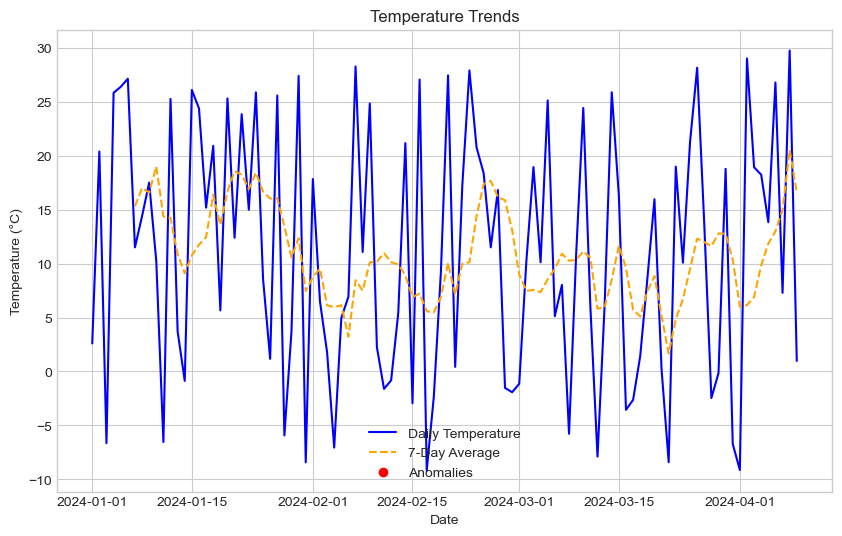

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def load_data(file_path):
    """Load temperature data from a CSV file."""
    try:
        data = pd.read_csv(file_path, parse_dates=["Date"])
        print("Data loaded successfully!")
        return data
    except Exception as e:
        print("Error loading data:", e)
        return None

def plot_temperature(data, save_file=None):
    """Plot temperature trends with options for rolling average and anomalies."""
    # Add Rolling Average
    data["7-Day Average"] = data["Temperature"].rolling(window=7).mean()
    
    # Identify Anomalies
    mean_temp = data["Temperature"].mean()
    std_temp = data["Temperature"].std()
    data["Anomaly"] = (data["Temperature"] > mean_temp + 2 * std_temp) | (data["Temperature"] < mean_temp - 2 * std_temp)
    
    # Plot
    plt.style.use("seaborn-v0_8-whitegrid")
    plt.figure(figsize=(10, 6))
    plt.plot(data["Date"], data["Temperature"], label="Daily Temperature", color="blue")
    plt.plot(data["Date"], data["7-Day Average"], label="7-Day Average", linestyle="--", color="orange")
    plt.scatter(data[data["Anomaly"]]["Date"], data[data["Anomaly"]]["Temperature"], color="red", label="Anomalies")
    plt.title("Temperature Trends")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.legend()
    plt.grid(True)

    # Save or Show Plot
    if save_file:
        plt.savefig(save_file)
        print(f"Plot saved as {save_file}")
    else:
        plt.show()

def main():
    print("Welcome to the Temperature Plotter!")
    
    # Load Data
    file_path = input("Enter the path to your temperature CSV file: ")
    data = load_data(file_path)
    if data is None:
        return
    
    # Plot Temperature
    save_choice = input("Do you want to save the plot? (yes/no): ").lower()
    if save_choice == "yes":
        file_name = input("Enter the file name (e.g., temperature_plot.png): ")
        plot_temperature(data, save_file=file_name)
    else:
        plot_temperature(data)

if __name__ == "__main__":
    main()